In [0]:
import numpy as np
import PyPDF2
import docx2txt
import sys
import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
!pip install networkx

In [0]:
def read_doc():
  name = input("Name of file")
  f = open(name,'r')
  document = f.read()
  f.close()
  return document

In [0]:
def tokenize(document):
  doc_tokenizer = PunktSentenceTokenizer()
  sentences_list = doc_tokenizer.tokenize(document)
  return sentences_list

In [34]:
document = read_doc()
print("length of that document",len(document))

Name of file/content/test.txt
length of that document 1996


In [35]:
sentences_list = tokenize(document)
for i in sentences_list:
  print(i)

In the initial block tensorflow placeholders and variables are initialised along with building the RNN model architecture class that would be used for encoder and decoder.
In the embedding block we need to preprocess the dataset so as to feed into the next module.
Further, Glove(Global Vectors for Word Representation) was used  to create word embeddings.
In the next block, an encoder which is the multilayer bidirectional long short term memory network which comprises of forward and backward cells and stacked bidirectional dynamic recurrent neural network are used to connect them together.
This will give two main outputs, encoder output and encoder state.
Encoder output would be used for attention calculation and encoder state returns the initial state of the decoder.
Then comes the decoder block which has two parts.
For the training part it uses attention and for testing it uses beam search.
Attention allows models to focus on relevant parts of the sentences and is useful when the sent

In [36]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

print(cv.get_feature_names())
print(cv_matrix.toarray())

['acceptable', 'actually', 'adam', 'all', 'allows', 'along', 'an', 'and', 'applying', 'approximate', 'architecture', 'are', 'arises', 'as', 'assigns', 'attention', 'backward', 'be', 'beam', 'because', 'better', 'bidirectional', 'block', 'building', 'but', 'by', 'calculating', 'calculation', 'candidates', 'cells', 'choose', 'class', 'clipping', 'comes', 'comprises', 'connect', 'copied', 'create', 'cross', 'dataset', 'decoder', 'dynamic', 'embedding', 'embeddings', 'encoder', 'entropy', 'error', 'even', 'faced', 'factual', 'feed', 'few', 'final', 'focus', 'for', 'forward', 'from', 'further', 'generated', 'generation', 'give', 'given', 'global', 'glove', 'gradient', 'gradients', 'greedy', 'has', 'if', 'in', 'information', 'initial', 'initialised', 'into', 'is', 'issue', 'issues', 'it', 'latter', 'like', 'limited', 'long', 'loss', 'main', 'memory', 'model', 'models', 'module', 'multilayer', 'multiple', 'need', 'needs', 'network', 'neural', 'new', 'next', 'not', 'occurs', 'of', 'on', 'one',

In [37]:
normalized_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normalized_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.20199797]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.45766475 0.         0.        ]
 ...
 [0.24677555 0.         0.         ... 0.19327546 0.         0.        ]
 [0.         0.         0.         ... 0.14470918 0.18476576 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [38]:
print(normalized_matrix.T.toarray)
residual_graph = normalized_matrix * normalized_matrix.T

<bound method _cs_matrix.toarray of <173x17 sparse matrix of type '<class 'numpy.float64'>'
	with 286 stored elements in Compressed Sparse Column format>>


In [0]:
#### Each node represents a sentence, while each edge represents they have words in common

nx_graph = nx.from_scipy_sparse_matrix(residual_graph)

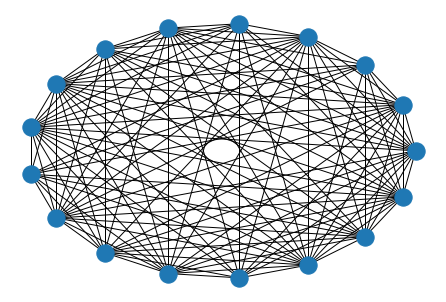

In [40]:
nx.draw_circular(nx_graph)
plt.show()

In [0]:
#### PageRank returns a dictionary with key = node(sentences) and value = rank of each of the sentences

ranking = nx.pagerank(nx_graph)

In [0]:
#### Ranking of the sentences

sentence_array = sorted(((ranking[i], s) for i, s in enumerate(sentences_list)), reverse=True)

In [0]:
## Gives max value of score of the sentence
max_rank = float(sentence_array[0][0])  
## Gives min value of the score of the sentence
min_rank = float(sentence_array[len(sentence_array)-1][0])  

In [0]:
#### Normalization of the scores of the sentences

tmp = []
flag = 0
if max_rank - min_rank == 0:
  tmp.append(0)
  flag = 1

if flag != 1:
  for i in range(0, len(sentence_array)):
    tmp.append((float(sentence_array[i][0]) - min_rank)/ max_rank - min_rank)

In [0]:
threshold = sum(tmp)/len(tmp) + 0.2

In [0]:
#### Finding those sentences which bypass through those sentences

sentence_list = []
if len(tmp) > 1:
  for i in range(0, len(tmp)):
    if tmp[i] > threshold:
      sentence_list.append(sentence_array[i][1])
    else:
      sentence_list.append(sentence_array[0][1])

In [44]:
summary = ' '.join(str(x) for x in sentence_list)
print(summary[1])

m


In [0]:
from rouge import Rouge 

hypothesis = "the #### transcript is a written version of each day 's cnn student news program use this transcript to he    lp students with reading comprehension and vocabulary use the weekly newsquiz to test your knowledge of storie s you     saw on cnn student news"

reference = "this page includes the show transcript use the transcript to help students with reading comprehension and     vocabulary at the bottom of the page , comment for a chance to be mentioned on cnn student news . you must be a teac    her or a student age # # or older to request a mention on the cnn student news roll call . the weekly newsquiz tests     students ' knowledge of even ts in the news"

rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)

In [46]:
!pip install rouge 

In [0]:
len(hypothesis)

254

In [0]:
len(reference)

394